In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial

# Mine
from wilson_cowan_2d.systems import concrete_wc_kernel as wck
from wilson_cowan_2d.kernels import decreasing_exponential
from wilson_cowan_2d.kernels.kernels import make_K_2_populations
from wilson_cowan_2d.systems.nulclines import calc_cross_points, calc_nulclines_crosspoints
%load_ext autoreload
%autoreload 2

[[0.         0.005      0.083      0.424     ]
 [0.00394604 0.00394725 0.00396604 0.20470882]]


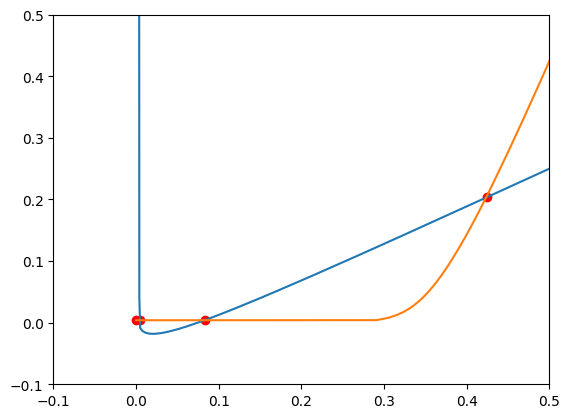

In [486]:
τe = 1
τi = 0.6 * τe
σe = 4
σi = 1 * σe

param = wck.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**9)
# param.Θ = np.array([0.08, 0.4])

u,v,cps = calc_nulclines_crosspoints(param)
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
_ = plt.xlim(-0.1, 0.5)
_ = plt.ylim(-0.1, 0.5)
print(cps)

u_str = cps[0,-1]
v_str = cps[1,-1]

u_str = 0
v_str = 0

u = u_str*np.ones(param.size).reshape((param.size,1))
v = v_str*np.ones(param.size).reshape((param.size, 1))
u[0:2**1] = 1
v[0:2**1] = 1

#  inp = (u3, v3, u3, 0)

inp = (u, v)

The solver successfully reached the end of the integration interval.


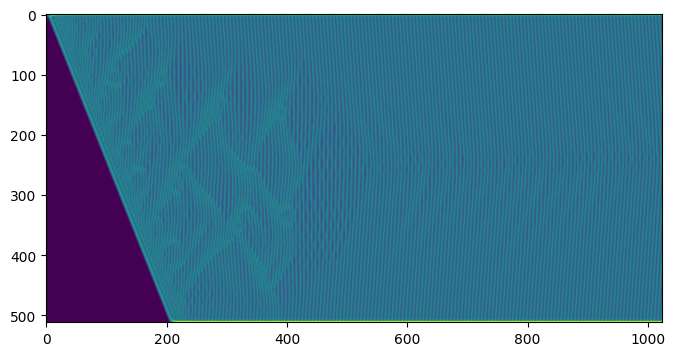

In [487]:
trv_wav = wck.WCDecExpTravelLocal1D(inp, param, np.array([σe, σi]))

end = 200
step = end/(param.size*2)
res = trv_wav((0, end), t_eval=np.arange(0, end, step))

print(res._solved.message)


fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.u, vmin=0, vmax=1)


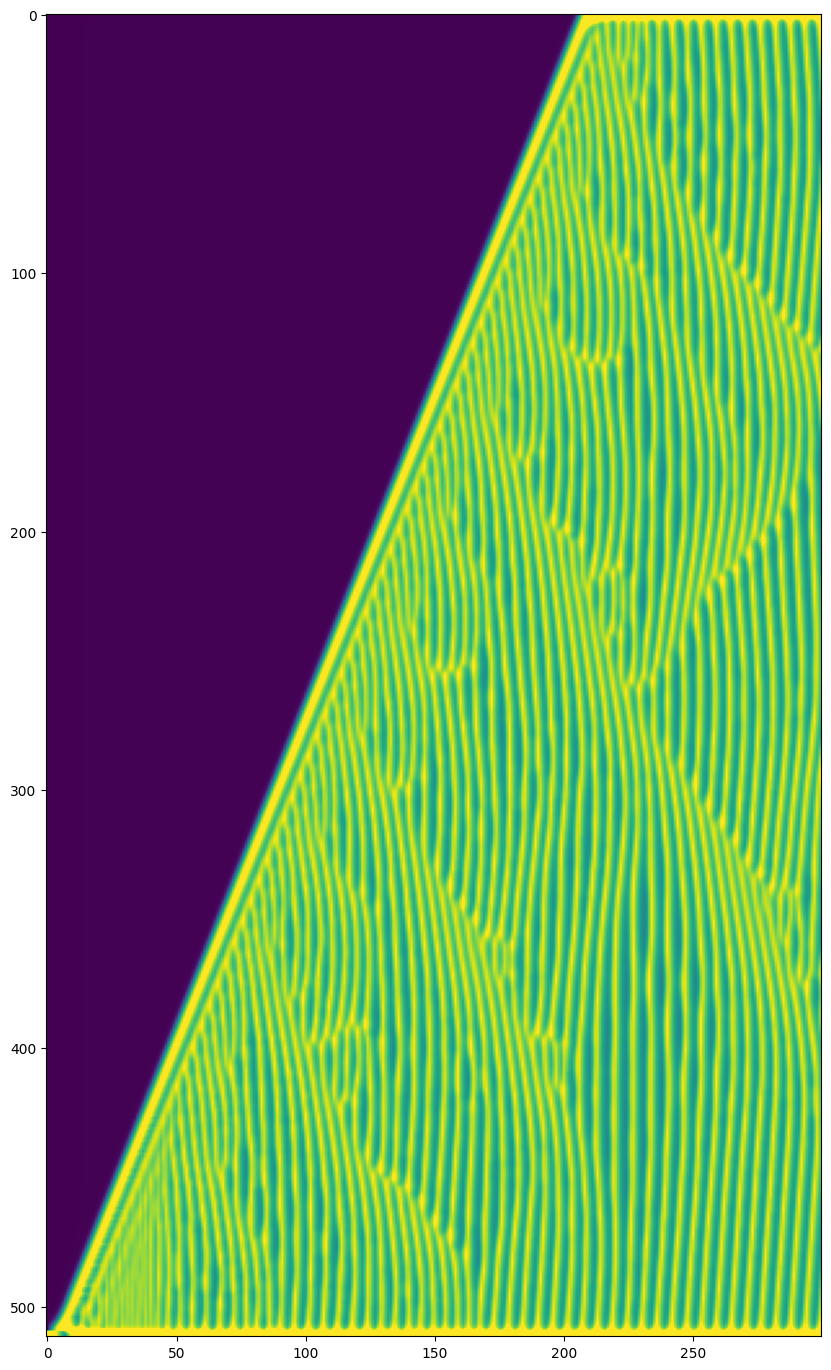

In [488]:
fig = plt.figure(figsize=(10,20))
plt.imshow(np.flip(res.u[:,:300], axis=0), aspect='equal', vmin=0, vmax=0.5)# plt.colorbar()

In [482]:
res.u[0]

array([1.        , 0.80099257, 0.7543703 , ..., 0.99876827, 0.99876833,
       0.99876839])

In [275]:
size = 2**8
abss = np.abs(np.linspace(-2*size, 2*size, 2*size-1))
# DEe = decreasing_exponential(abss, σe)


In [135]:
np.log2(abss.size+1)

9.0